### description:



Building a model to predict the voting of a group of people with random and related data

import dependecies

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random

create database

In [2]:

# Generate random ages between 18 and 80
ages = np.random.randint(low=18, high=80, size=1000)

# Generate random incomes between 0 and 100,000
incomes = np.random.randint(1,10, size=1000)


# Generate logical values for political affiliation (30% democrat, 30% republican, 40% independent)
political_affiliation = np.random.choice(['Democrat', 'Republican', 'Independent'], size=1000, p=[0.3, 0.3, 0.4])



# Generate logical values for past voting history (50% yes, 50% no)
past_voting_history = np.random.choice([0, 10], size=1000, p=[0.5, 0.5])





# Create data frame with the generated data

data = {
    'age': ages,
    'income': incomes,
    'past_voting_history': past_voting_history
    
}

r=data["age"]+data['income']*2+data["past_voting_history"]*2



result = []
for i in range(1000):
    
    if r.all() < 26:
        num = random.choices([0, 1], weights=[0.75, 0.25])[0] # choosing a number randomly with 25% probability of 0 and 75% probability of 1
    elif r.all() < 51:
        num = random.choices([0, 1], weights=[0.1, 0.5])[0] # choosing a number randomly with 50% probability of 0 and 50% probability of 1
    else:
        num = random.choices([0, 1], weights=[0.1, 0.9])[0] # choosing a number randomly with 90% probability of 0 and 70% probability of 1
    result.append(num)
    

data["result"]=result

df = pd.DataFrame(data)

df["result"].value_counts()

0    725
1    275
Name: result, dtype: int64

### split test and  train data

In [3]:
# x_data
x=np.asarray(df[["age","income","past_voting_history"]])

# y_data
y=np.asarray(df[["result"]])


In [4]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.18750678,  0.01276435,  1.        ],
       [-0.35295394, -0.76083246, -1.        ],
       [ 1.63241196,  1.55995795, -1.        ],
       [-1.06989163,  0.39956275,  1.        ],
       [-0.40810299, -0.76083246,  1.        ]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (800, 3) (800, 1)
Test set: (200, 3) (200, 1)


### create Logistic Regression with Scikit-learn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

### predict  data

In [7]:
yhat = LR.predict(X_test)
print(yhat[:5],
y_test[:5])

[0 0 0 0 0] [[0]
 [1]
 [0]
 [0]
 [1]]


### predict for  probability

In [8]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.6498868 , 0.3501132 ],
       [0.63623026, 0.36376974],
       [0.66938954, 0.33061046],
       [0.6130709 , 0.3869291 ],
       [0.65003469, 0.34996531],
       [0.63910245, 0.36089755],
       [0.65695227, 0.34304773],
       [0.62449329, 0.37550671],
       [0.65169638, 0.34830362],
       [0.65219418, 0.34780582],
       [0.63342375, 0.36657625],
       [0.65219418, 0.34780582],
       [0.6367065 , 0.3632935 ],
       [0.67378594, 0.32621406],
       [0.60533363, 0.39466637],
       [0.65033038, 0.34966962],
       [0.67712259, 0.32287741],
       [0.64108655, 0.35891345],
       [0.6592375 , 0.3407625 ],
       [0.66156385, 0.33843615],
       [0.63301489, 0.36698511],
       [0.65873234, 0.34126766],
       [0.63838377, 0.36161623],
       [0.61054945, 0.38945055],
       [0.66428117, 0.33571883],
       [0.6531949 , 0.3468051 ],
       [0.63956459, 0.36043541],
       [0.67523678, 0.32476322],
       [0.66305395, 0.33694605],
       [0.66645805, 0.33354195],
       [0.

### Evaluation

In [9]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.745

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  0  51]
 [  0 149]]


Confusion matrix, without normalization
[[  0  51]
 [  0 149]]


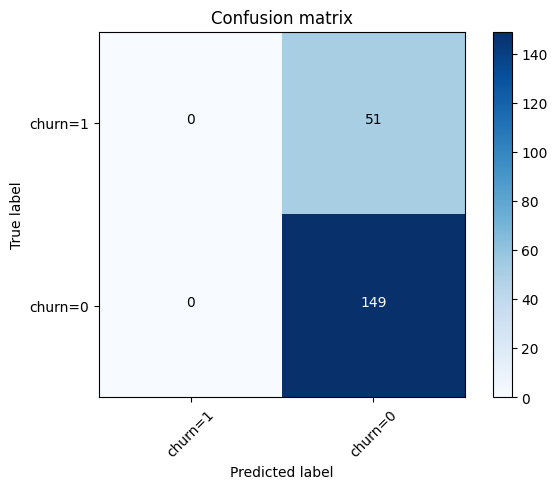

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')